In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import interpolate
from scipy import constants as cs
from astropy import units as un
import sys
sys.path.insert(0, '/home/sophia/bachelor_thesis_ipython_notebooks')

from Paolo_class import GCphasespace
from GC_Orbit_class import GCorbit

%matplotlib inline

In [2]:
### import data of simulation w/ IMBH1 ###
if 0:
    r_3d,v_r,v_t,x,y,z,vx,vy,vz,vr,vtheta,vphi=np.loadtxt('C:\\Users\Sophia Milanov\Documents\Bachelorarbeit\data\\x-y-z.dat', usecols=(1,2,3,30,31,32,33,34,35,36,37,38), unpack=True)
elif 1:
    r_3d_1,m1_1,m2_1,x_1,y_1,z_1,vx_1,vy_1,vz_1=np.loadtxt('/home/sophia/Dokumente/Bachelorarbeit-2/x-y-z_IMBH1.dat', usecols=(1,9,10,30,31,32,33,34,35), unpack=True)
else:
    r_3d,v_r,v_t,x,y,z,vx,vy,vz,vr,vtheta,vphi=np.loadtxt('/home/milanov/Bachelorarbeit/x-y-z.dat', usecols=(1,2,3,30,31,32,33,34,35,36,37,38), unpack=True)

In [3]:
### import data of simulation w/ IMBH2 ###
if 0:
    r_3d,v_r,v_t,x,y,z,vx,vy,vz,vr,vtheta,vphi=np.loadtxt('C:\\Users\Sophia Milanov\Documents\Bachelorarbeit\data\\x-y-z.dat', usecols=(1,2,3,30,31,32,33,34,35,36,37,38), unpack=True)
elif 1:
    r_3d_2,m1_2,m2_2,x_2,y_2,z_2,vx_2,vy_2,vz_2=np.loadtxt('/home/sophia/Dokumente/Bachelorarbeit-2/x-y-z_IMBH2.dat', usecols=(1,9,10,30,31,32,33,34,35), unpack=True)
else:
    r_3d,v_r,v_t,x,y,z,vx,vy,vz,vr,vtheta,vphi=np.loadtxt('/home/milanov/Bachelorarbeit/x-y-z.dat', usecols=(1,2,3,30,31,32,33,34,35,36,37,38), unpack=True)

In [4]:
### import data of simulation w/o IMBH 1 ###
if 0:
    r_3d_wo,m1_wo,m2_wo,x_wo,y_wo,z_wo,vx_wo,vy_wo,vz_wo=np.loadtxt('C:\\Users\Sophia Milanov\Documents\Bachelorarbeit\data\\x-y-z.dat', usecols=(1,9,10,30,31,32,33,34,35), unpack=True)
elif 1:
    r_3d_wo_1,m1_wo_1,m2_wo_1,x_wo_1,y_wo_1,z_wo_1,vx_wo_1,vy_wo_1,vz_wo_1=np.loadtxt('/home/sophia/Dokumente/Bachelorarbeit-2/x-y-z_noIMBH1.dat', usecols=(1,9,10,29,30,31,32,33,34), unpack=True)
else:
    r_3d,m1,m2,x,y,z,vx,vy,vz=np.loadtxt('/home/milanov/Bachelorarbeit/x-y-z.dat', usecols=(1,9,10,30,31,32,33,34,35), unpack=True)

In [5]:
### import data of simulation w/o IMBH 2 ###
if 0:
    r_3d_wo,m1_wo,m2_wo,x_wo,y_wo,z_wo,vx_wo,vy_wo,vz_wo=np.loadtxt('C:\\Users\Sophia Milanov\Documents\Bachelorarbeit\data\\x-y-z.dat', usecols=(1,9,10,30,31,32,33,34,35), unpack=True)
elif 1:
    r_3d_wo_2,m1_wo_2,m2_wo_2,x_wo_2,y_wo_2,z_wo_2,vx_wo_2,vy_wo_2,vz_wo_2=np.loadtxt('/home/sophia/Dokumente/Bachelorarbeit-2/x-y-z_noIMBH2.dat', usecols=(1,9,10,30,31,32,33,34,35), unpack=True)
else:
    r_3d,m1,m2,x,y,z,vx,vy,vz=np.loadtxt('/home/milanov/Bachelorarbeit/x-y-z.dat', usecols=(1,9,10,30,31,32,33,34,35), unpack=True)

In [6]:
### import half mass and half light radii ###
hmr_bh_1,hmr_bh_2,hlr_bh_1,hlr_bh_2,hmr_wo_bh_1,hmr_wo_bh_2,hlr_wo_bh_1,hlr_wo_bh_2=np.loadtxt('half_mass_and_half_light_radius')

In [7]:
### initialize orbit class ###

bh_orbit_1=GCorbit(inputfilename='densityfile_IMBH1.txt',bhmass_M_sun=m1_1[0]+m2_1[0])
bh_orbit_2=GCorbit(inputfilename='densityfile_IMBH2.txt',bhmass_M_sun=m1_2[0]+m2_2[0])
wobh_orbit_1=GCorbit(inputfilename='densityfile_noIMBH1.txt')
wobh_orbit_2=GCorbit(inputfilename='densityfile_noIMBH2.txt')

/home/sophia/bachelor_thesis_ipython_notebooks/GC_Orbit_class.py:68: RuntimeWarning: overflow encountered in exp
  density= np.exp(self.s(np.log(r)))


In [8]:
### calculate potential for each simulation ###
pot_bh_1=bh_orbit_1.potential(r_3d_1[1:])
pot_bh_2=bh_orbit_2.potential(r_3d_2[1:])
pot_wobh_1=wobh_orbit_1.potential(r_3d_wo_1)
pot_wobh_2=wobh_orbit_2.potential(r_3d_wo_2)

In [9]:
### calculate distance over effective radius ###
r_plot_bh_1=r_3d_1/hmr_bh_1
r_plot_bh_2=r_3d_2/hmr_bh_2
r_plot_wobh_1= r_3d_wo_1/hmr_wo_bh_1
r_plot_wobh_2= r_3d_wo_2/hmr_wo_bh_2

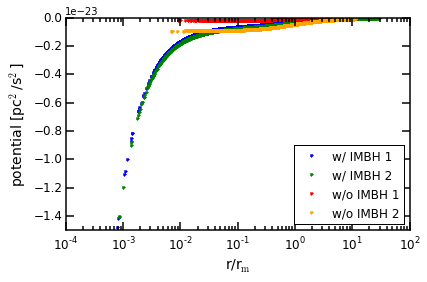

In [10]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.semilogx(r_plot_bh_1[1:],pot_bh_1,'b.',label='w/ IMBH 1')
ax.semilogx(r_plot_bh_2[1:],pot_bh_2,'g.',label='w/ IMBH 2')
ax.semilogx(r_plot_wobh_1,pot_wobh_1,'r.',label='w/o IMBH 1')
ax.semilogx(r_plot_wobh_2,pot_wobh_2,'.',color='orange',label='w/o IMBH 2')
ax.set_xlabel('r/r$_\mathrm{m}$',fontsize=14)
ax.set_ylabel('potential [pc$^2$/s$^2$]',fontsize=14)
ax.set_ylim(-1.5e-23)
ax.spines['top'].set_linewidth(1.5)
ax.spines['right'].set_linewidth(1.5)
ax.spines['bottom'].set_linewidth(1.5)
ax.spines['left'].set_linewidth(1.5)
ax.legend(loc=0,numpoints=1)
ax.tick_params(length=8,width=1.5,labelsize=12)
ax.tick_params(which='minor',length=4,width=1.5)
fig.tight_layout()

In [11]:
fig.savefig('../../sophia/Bachelorarbeit-Entwurf/Plots/potential.png', format='png',dpi=300,bbox_inches='tight')